<a href="https://colab.research.google.com/github/SaugataDeb/SaugataDeb-Bike-Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##lets import the modules

In [1]:
#importing all the modules required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': '--'})

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

!pip install shap
from sklearn.tree import export_graphviz
import shap 
!pip install catBoost
from catboost import CatBoostRegressor
import lightgbm as lgb
!pip install eli5
import eli5 as eli

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 564 kB 6.8 MB/s 
     |████████████████████████████████| 76.6 MB 72 kB/s 
     |████████████████████████████████| 216 kB 7.2 MB/s 
     |████████████████████████████████| 133 kB 12.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b84534f2f1ce3fbf424f8afc67ded002784ee7c24139c4721c2e9c505d390fa3
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.

##Lets mount the Drive

In [2]:
#mounting the google drive to explore the data

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#loading dataset from google drive

data='/content/drive/MyDrive/Capstone Project 2/Data & resources/SeoulBikeData.csv'

seoul_df=pd.read_csv(data,encoding='latin')


##Let's first Explore the Data

In [4]:
seoul_df.head() #let's get the dataset information of 1st 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
seoul_df.shape 

(8760, 14)

Here we can see there is 8760 rows and 14 columns which we can also summarise as feature of the dataset

In [6]:
seoul_df.info()  #checking the null values,the data types and the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
seoul_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

As from the information aquired we can say there no such null values in the data set also we can see there is 4 integer type,6 float type and 4 string type features.

In [8]:
seoul_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
#checking the duplicate values
len(seoul_df[seoul_df.duplicated()])  

0

As we can see no duplicated data is present

In [10]:
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

##Exploratory Data Analysis

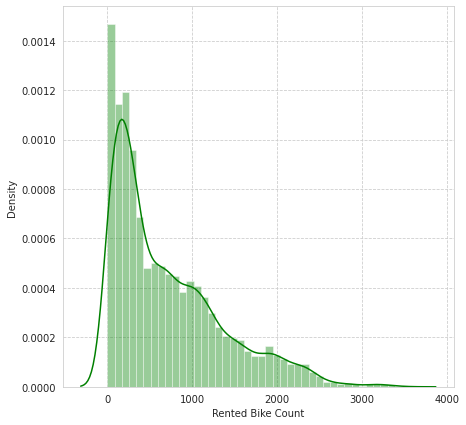

In [11]:
#Dependent variable rented bike count
plt.figure(figsize=(7,7))
sns.distplot(seoul_df['Rented Bike Count'],color='g')

##Let do Strip time to get individual day, month and year column from DATE feature for greater explainability 

In [12]:
seoul_df['Date']=seoul_df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))


seoul_df['month']=seoul_df['Date'].dt.month
seoul_df['day']=seoul_df['Date'].dt.day_name()
seoul_df['weekend']=seoul_df['day'].apply(lambda x : 1 if x == 'Saturday' or x=='Sunday' else 0)

In [13]:
#Dropping the Date column
seoul_df=seoul_df.drop(columns=['Date','day'],axis=1)

In [14]:
seoul_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [15]:
numeric_feature=seoul_df.select_dtypes(include='number')
numeric_feature

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


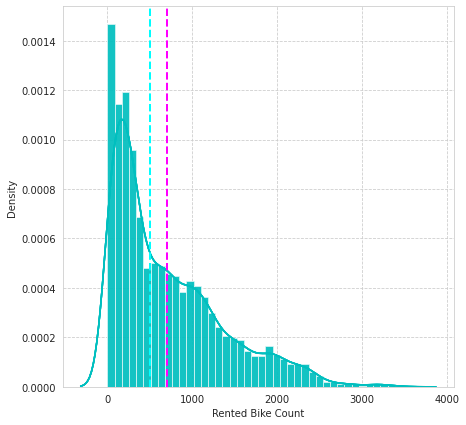

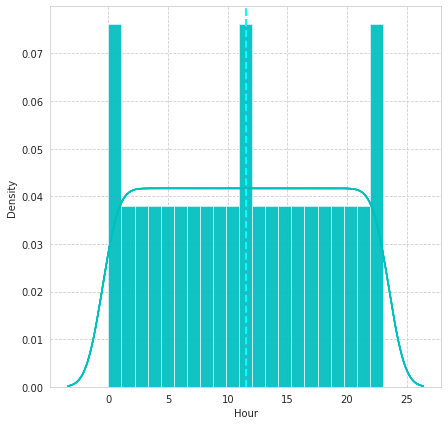

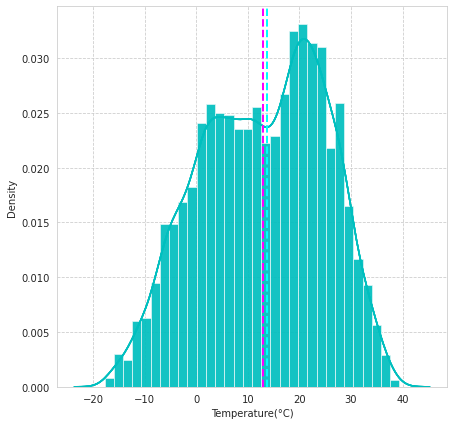

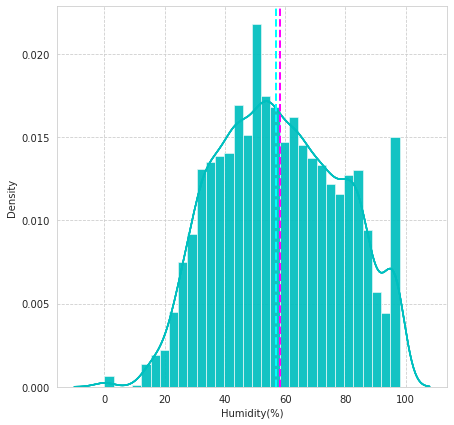

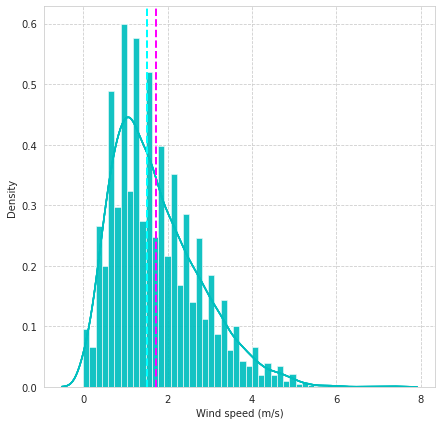

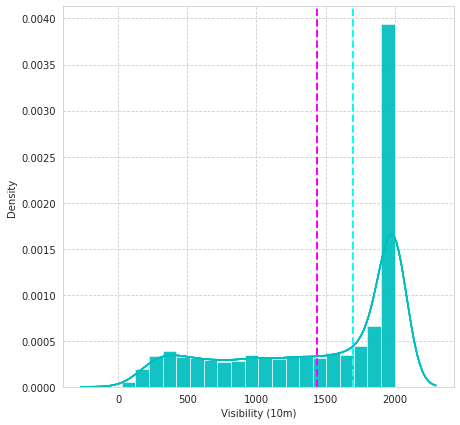

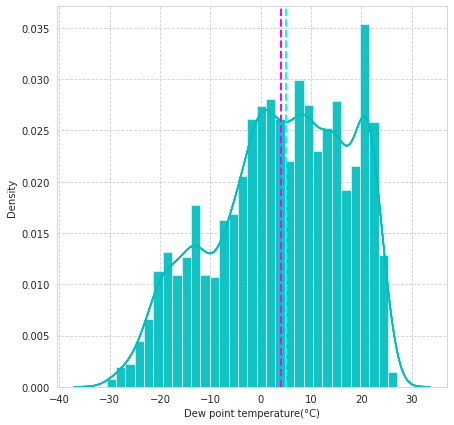

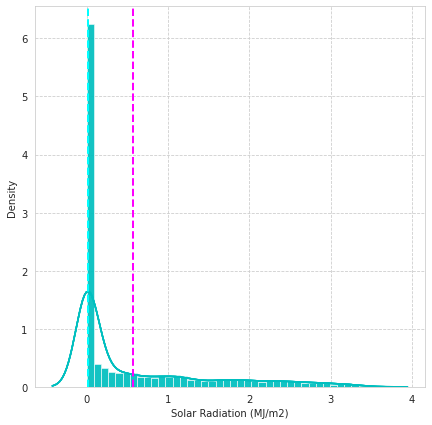

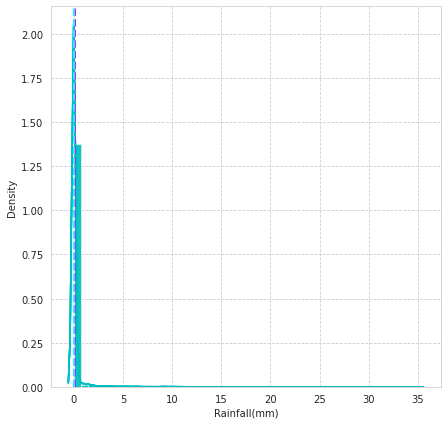

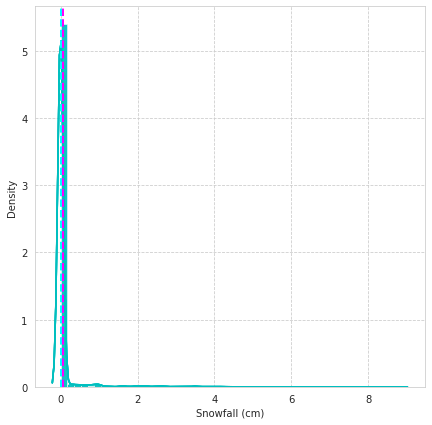

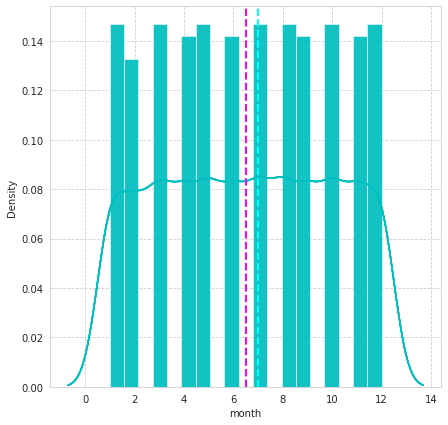

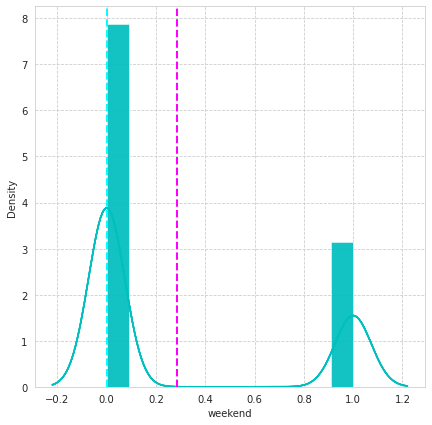

In [16]:
#finding the mean and median of each variable by plotting  
for el in numeric_feature[:]:
  fig=plt.figure(figsize=(7,7))
  c = ['green', 'yellow', 'pink', 'maroon', 'orange']
  for i in c:
    sns.distplot(seoul_df[el],color='c')
  plt.axvline(seoul_df[el].mean(),color='magenta', linestyle='dashed',linewidth=2)
  plt.axvline(seoul_df[el].median(),color='cyan', linestyle='dashed',linewidth=2)
  plt.show()

##Feature Selection

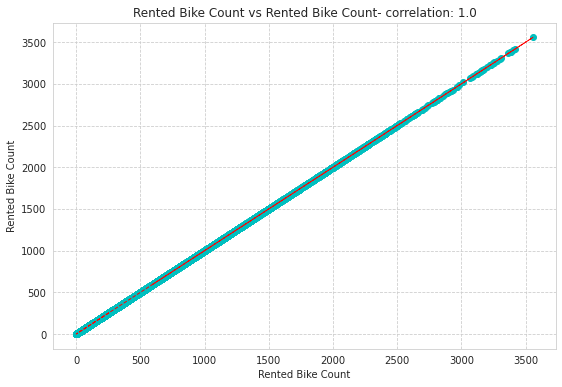

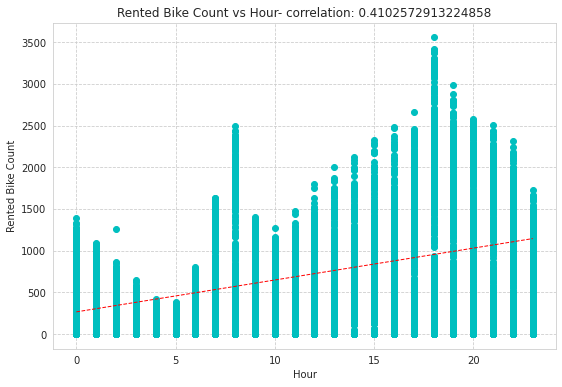

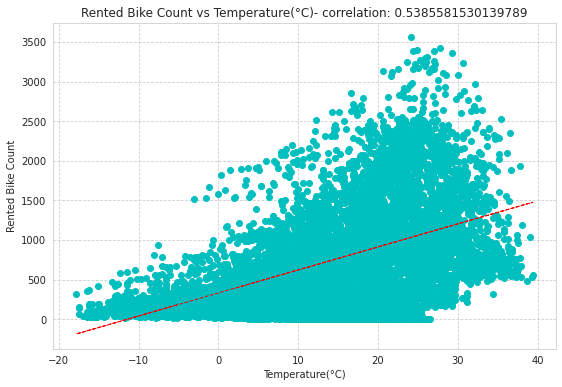

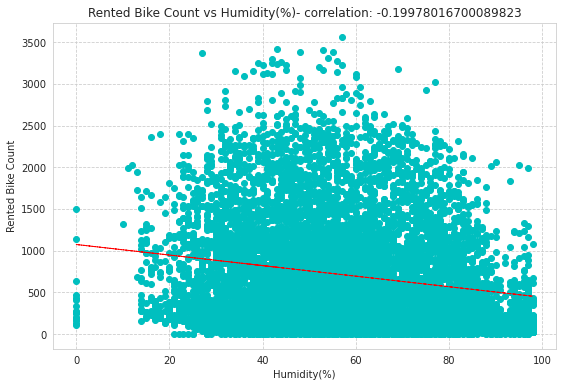

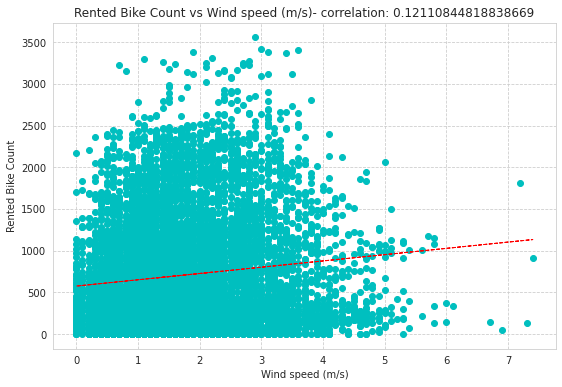

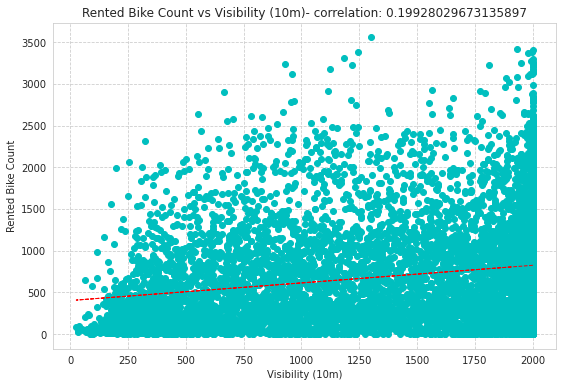

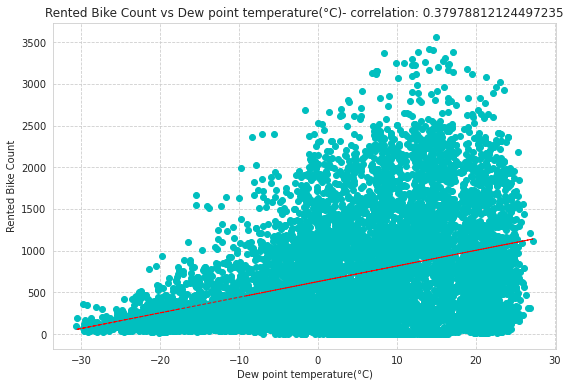

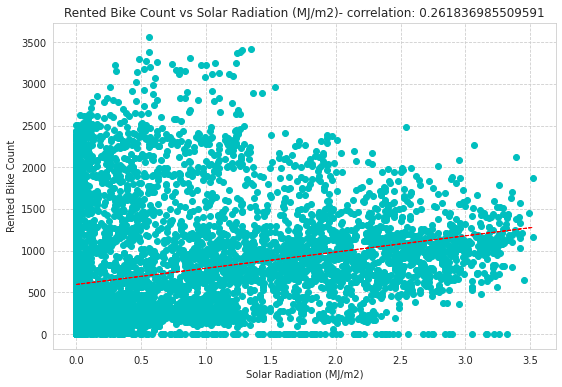

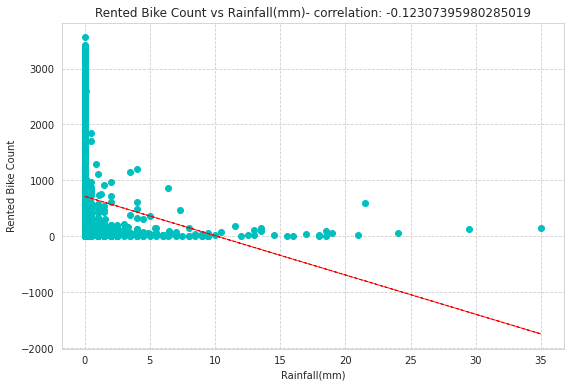

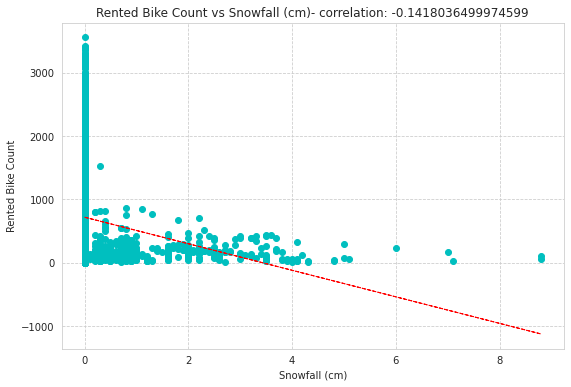

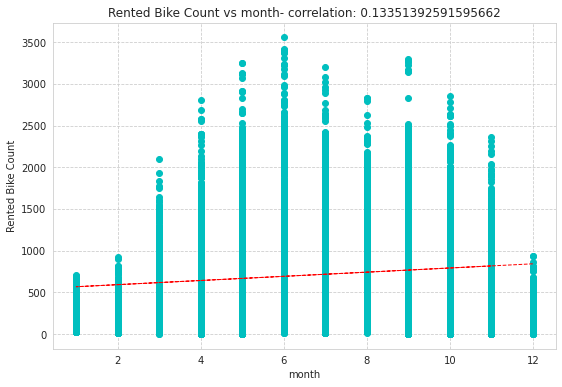

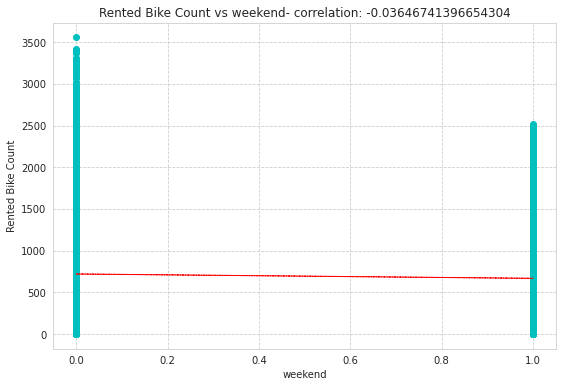

In [17]:
#Using for loop to find the scatter plot between rented bike count vs numeric features so as to find the correlation between them
for ele in numeric_feature[1:]:   
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = seoul_df[ele]
    label = seoul_df['Rented Bike Count']
    correlation = feature.corr(label)
    c = ['green', 'yellow', 'pink', 'maroon', 'orange']
    plt.scatter(x=feature, y=label, color='c')
    plt.xlabel(ele)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + ele + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_df[ele],seoul_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(seoul_df[ele])

    plt.plot(seoul_df[ele], y_hat, "r--", lw=1)

plt.show()

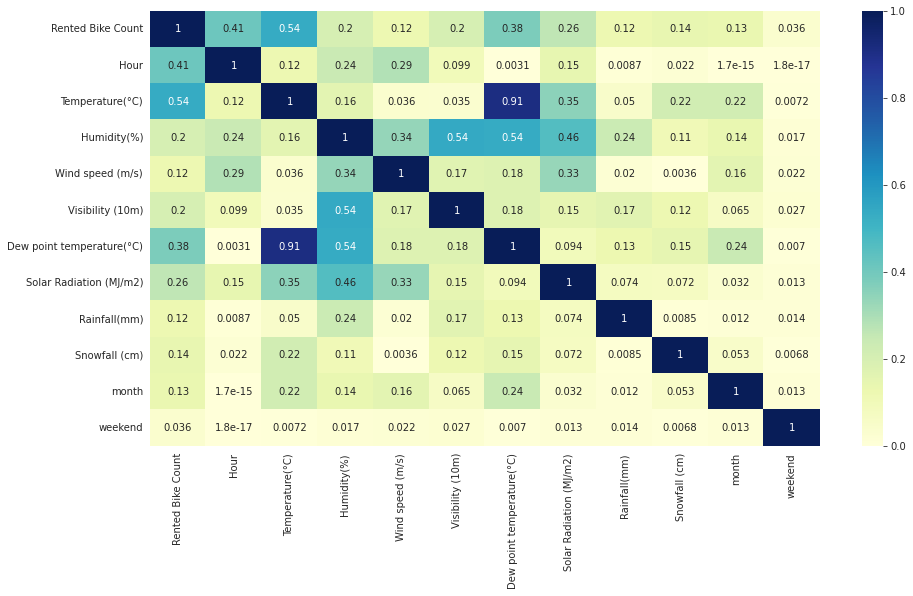

In [18]:
#lets check the corellation between the independent variable using Heatmap

plt.figure(figsize=(15,8))
correlation = seoul_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="YlGnBu")

##Feature Selection

In [19]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
calculate_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.425348
1,Temperature(°C),34.919399
2,Humidity(%),7.003058
3,Wind speed (m/s),4.881602
4,Visibility (10m),9.378738
5,Dew point temperature(°C),17.802987
6,Solar Radiation (MJ/m2),2.882967
7,Rainfall(mm),1.082184
8,Snowfall (cm),1.131902
9,month,5.094506


Above we can see that year highly collinear. Let see whether it does any effect or not by not selecting it.

In [21]:
calculate_vif(seoul_df[[i for i in seoul_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.425348
1,Temperature(°C),34.919399
2,Humidity(%),7.003058
3,Wind speed (m/s),4.881602
4,Visibility (10m),9.378738
5,Dew point temperature(°C),17.802987
6,Solar Radiation (MJ/m2),2.882967
7,Rainfall(mm),1.082184
8,Snowfall (cm),1.131902
9,month,5.094506


In [22]:
seoul_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [23]:

string_features = seoul_df.select_dtypes(include='object')
string_features


,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


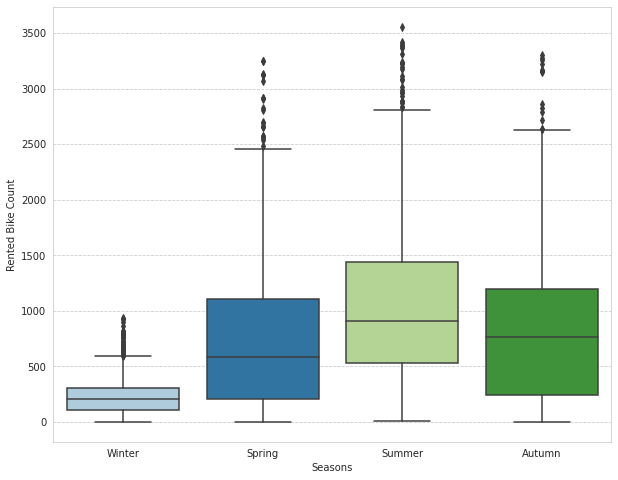

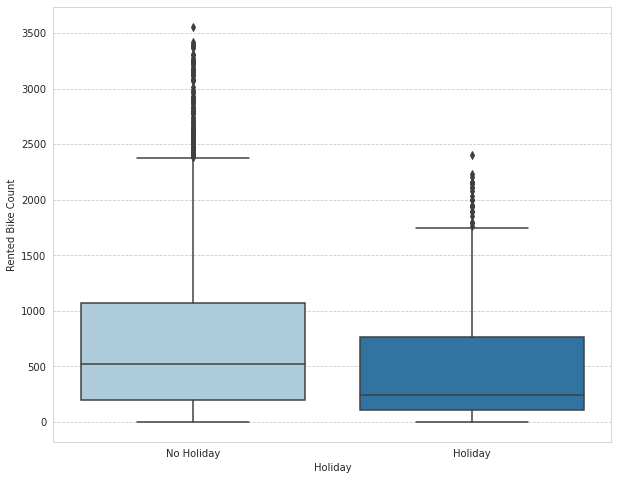

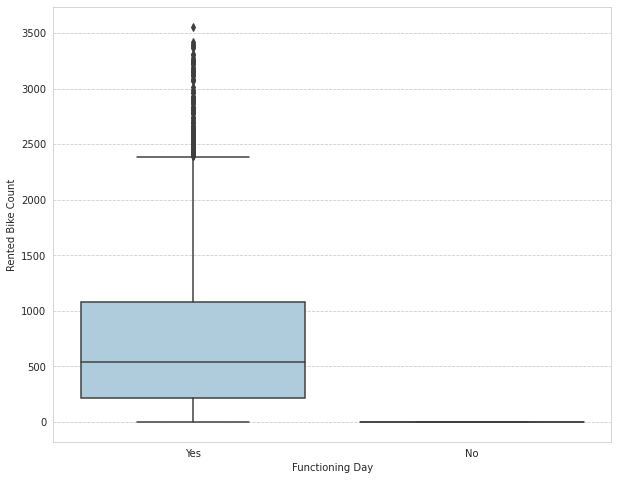

In [24]:
#Using boxplot for each categorical Feature
for elem in string_features[:]:
     plt.figure(figsize=(10,8))
     sns.boxplot(x=seoul_df[elem],y=seoul_df["Rented Bike Count"],palette="Paired")
     plt.show()

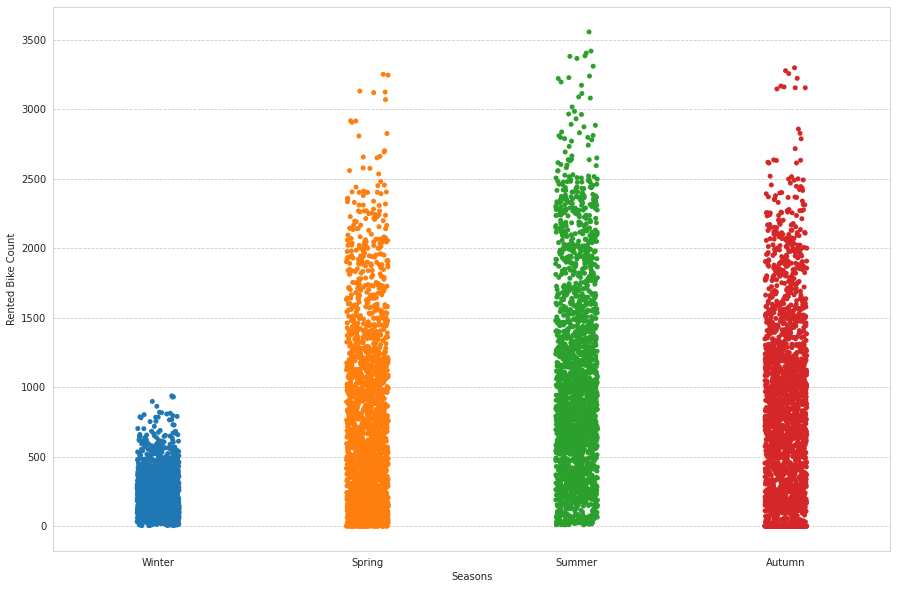

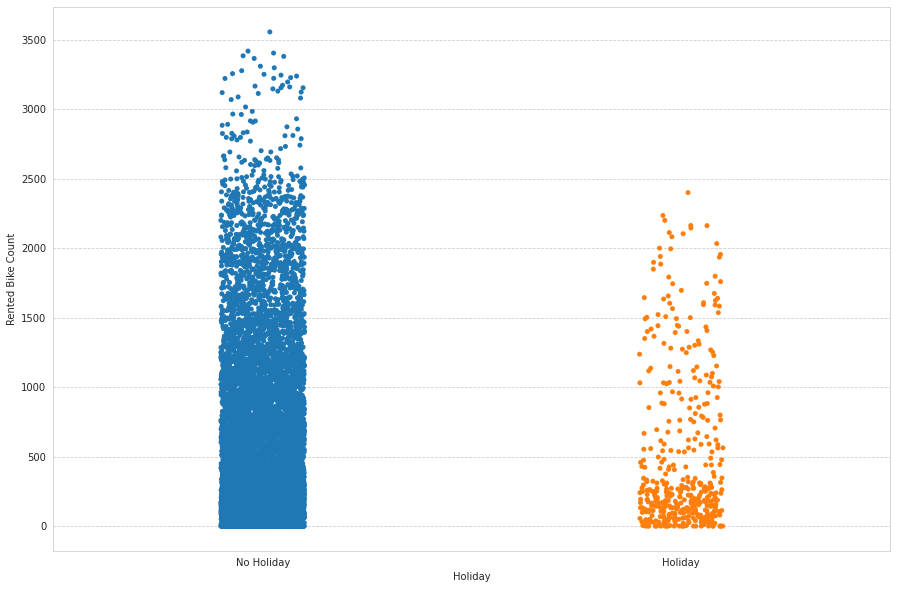

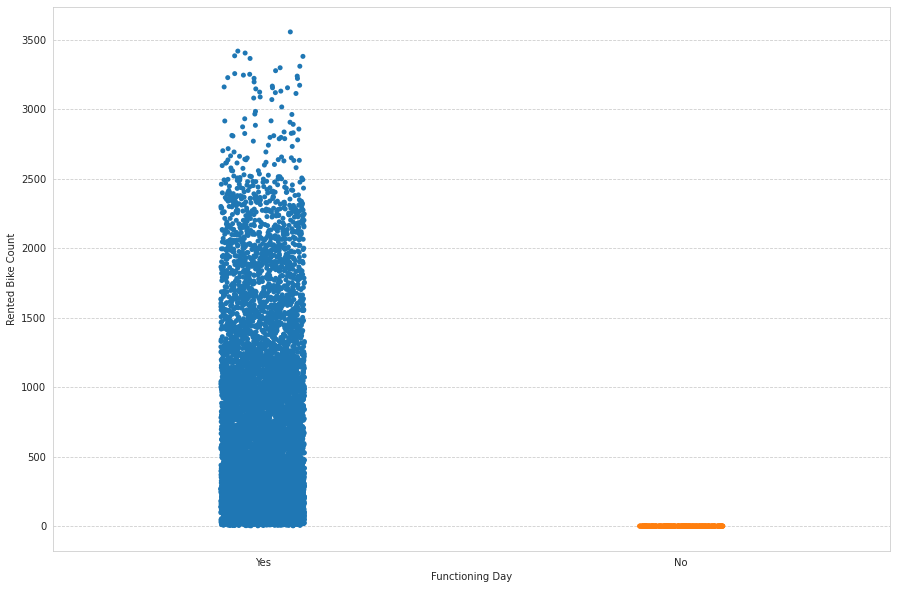

In [25]:
#Let get boxplot for each categorical Feature
for elem in string_features[:]:
     plt.figure(figsize=(15,10))
     sns.stripplot(x=elem,y="Rented Bike Count",data=seoul_df)
     plt.show()

In [26]:
numeric_feature2=['Hour','Rainfall(mm)', 'Snowfall (cm)', 'month','weekend']
numeric_feature2

['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'month', 'weekend']

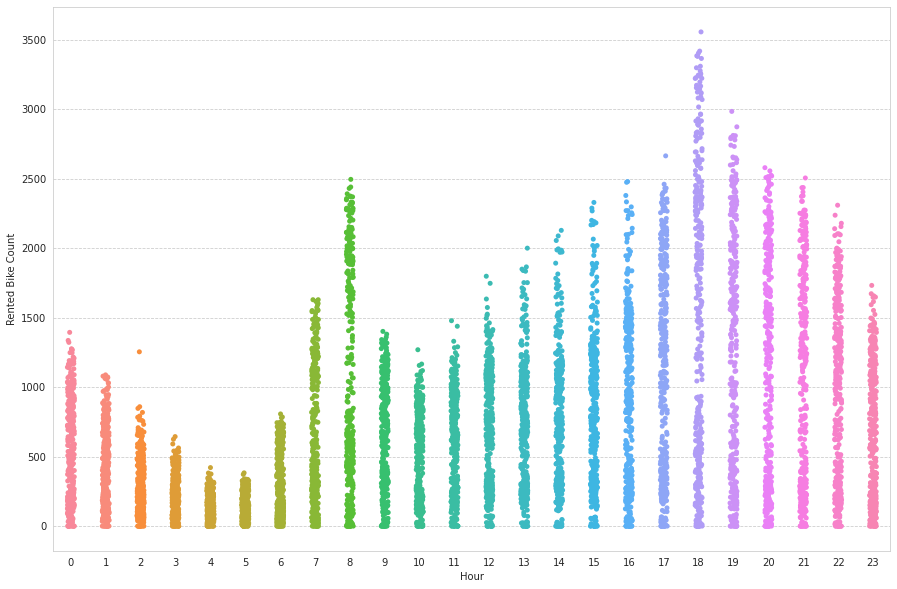

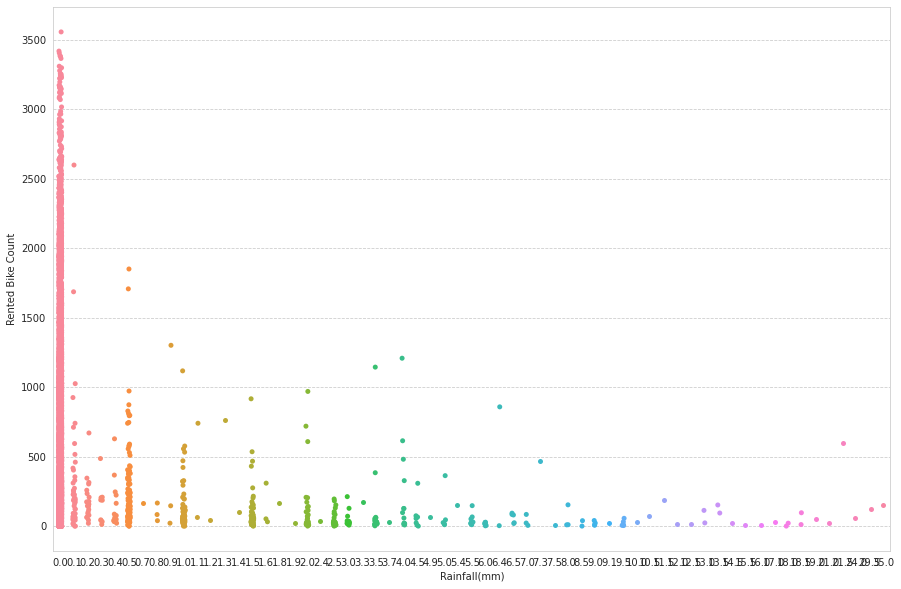

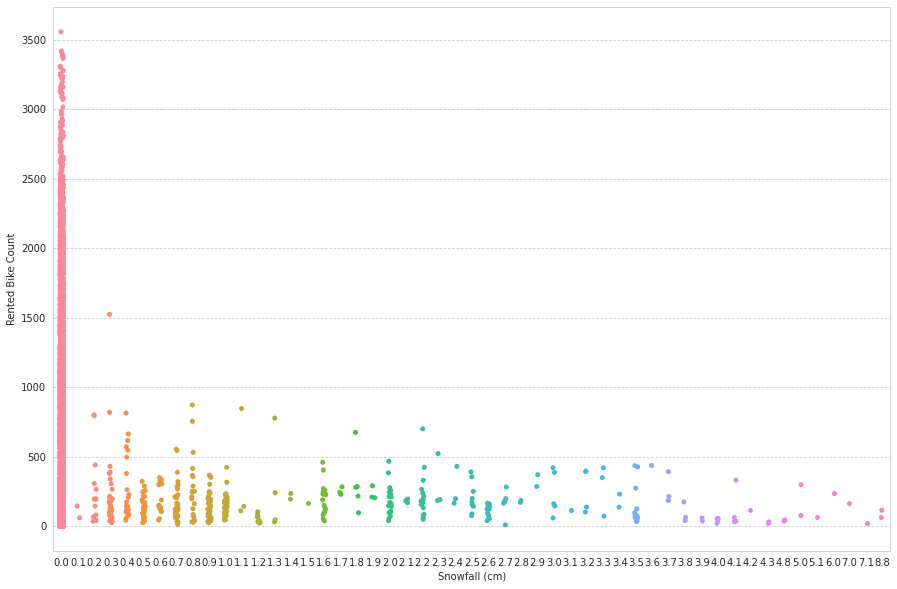

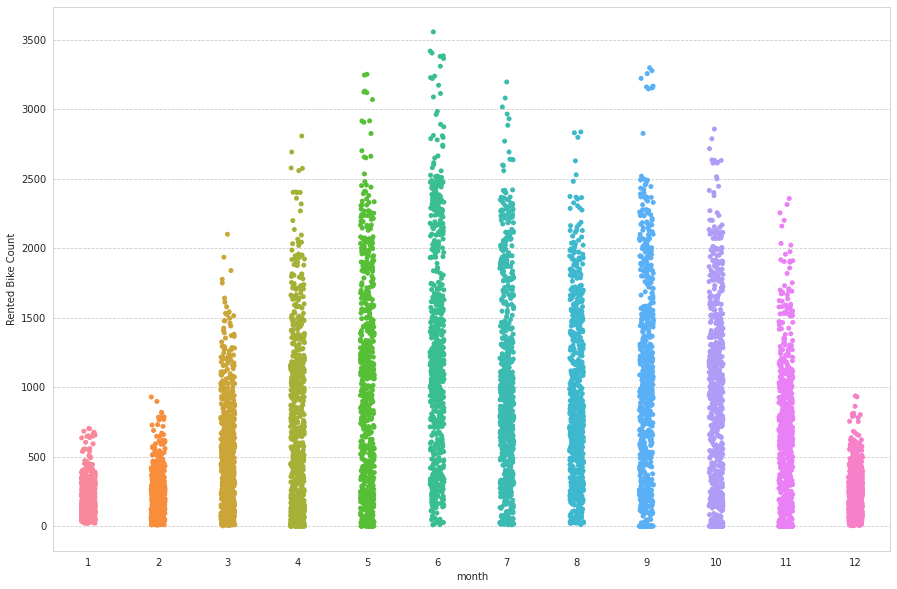

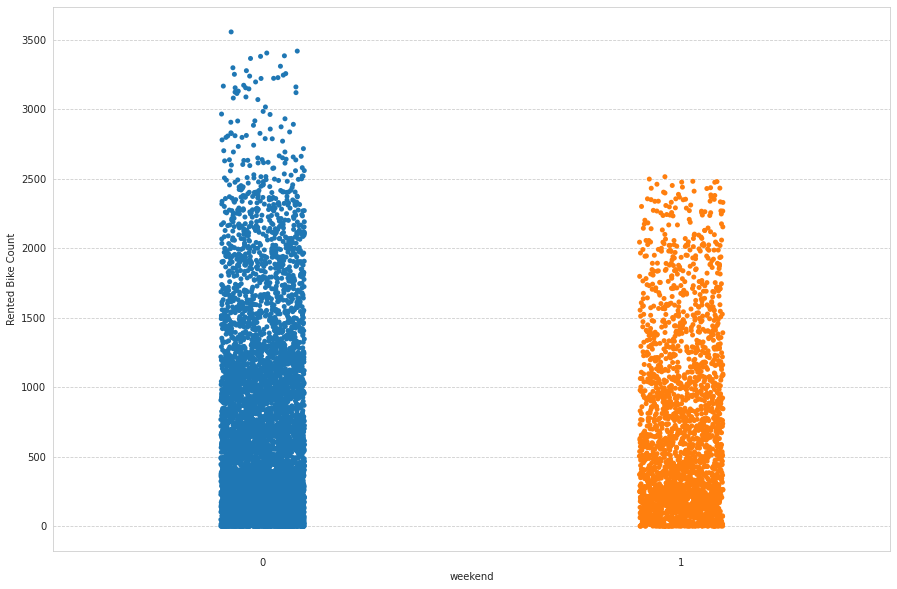

In [27]:
for elem2 in numeric_feature2:
  plt.figure(figsize=(15,10))
  sns.stripplot(x=elem2, y ='Rented Bike Count',data=seoul_df)
  plt.show()

#Lets see relationship between Categorical Feature vs Avg Bike rented

In [28]:
numeric_feature3=['Hour','month']

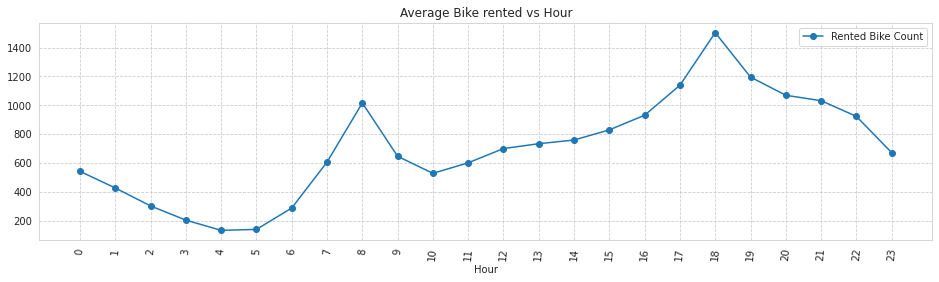

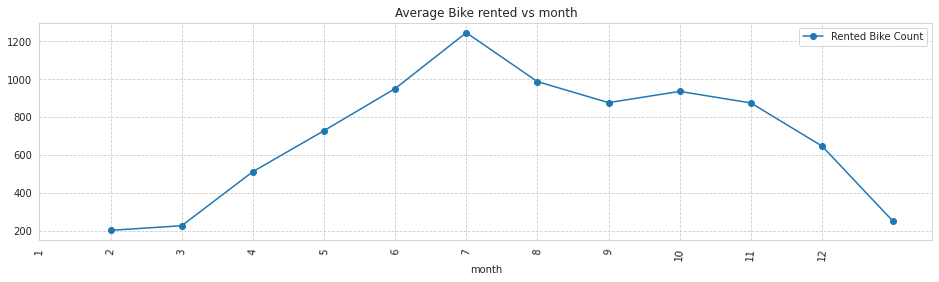

In [29]:
for fea in numeric_feature3:
 

  avg_bike=seoul_df.groupby(fea)['Rented Bike Count'].mean()
  plt.figure(figsize=(16,4))
  s=avg_bike.plot(legend=True, marker='o',title=f'Average Bike rented vs {fea}')
  s.set_xticks(range(len(avg_bike)))
  s.set_xticklabels(avg_bike.index.tolist(),rotation = 85)
  plt.show()

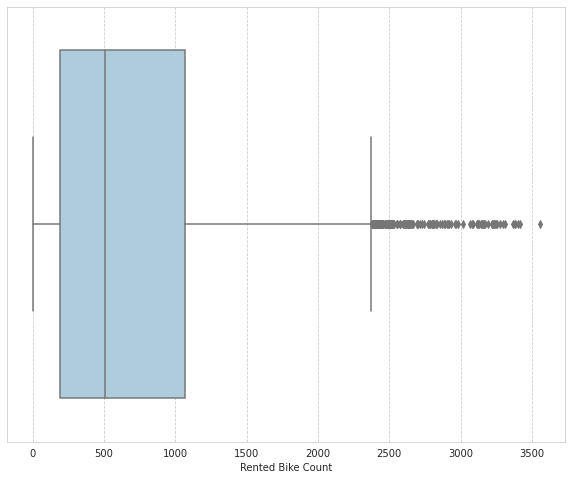

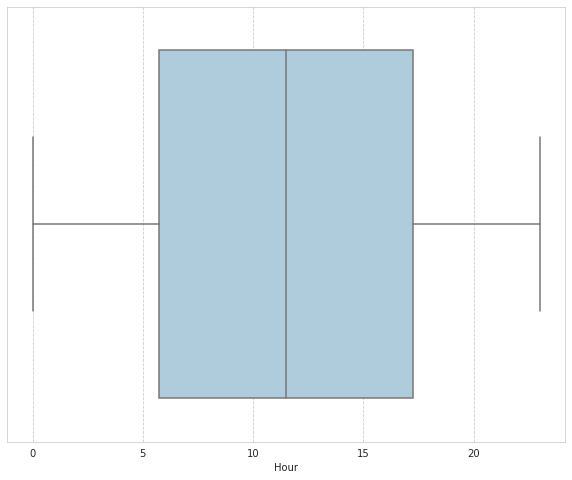

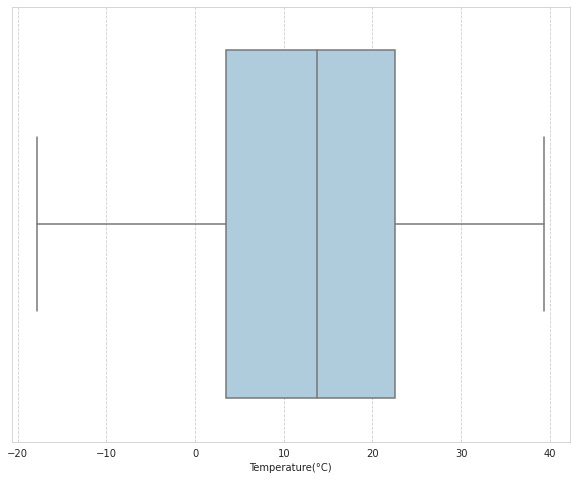

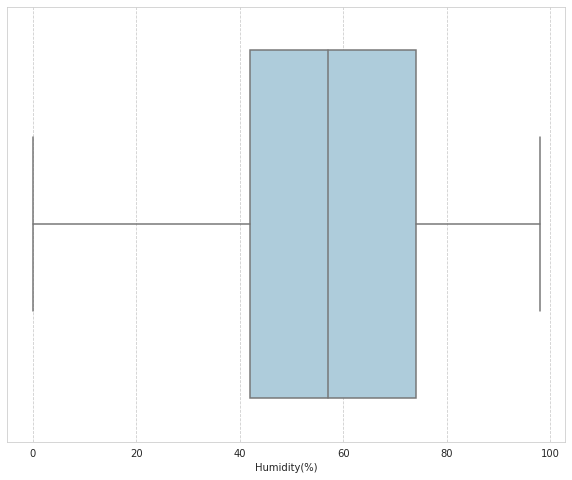

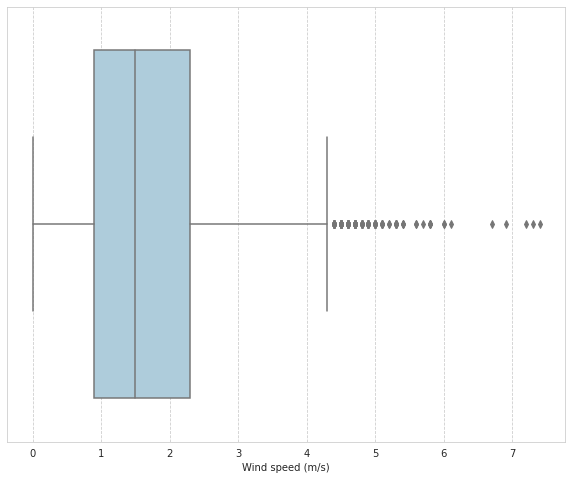

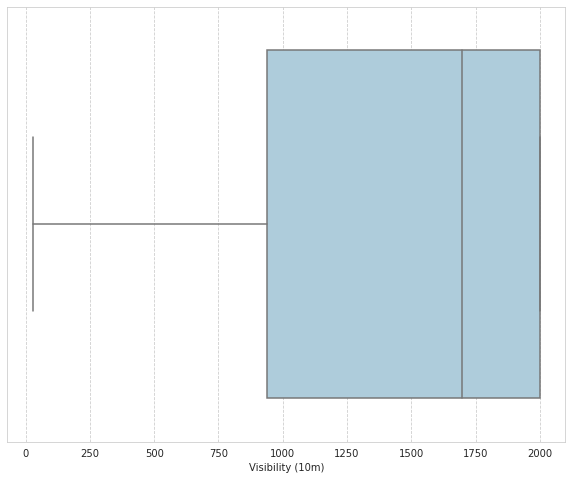

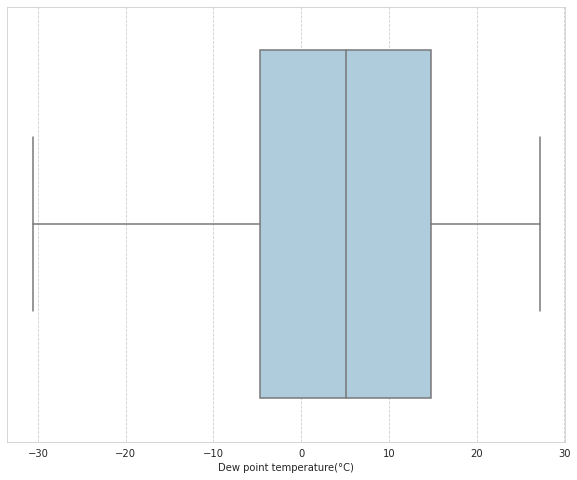

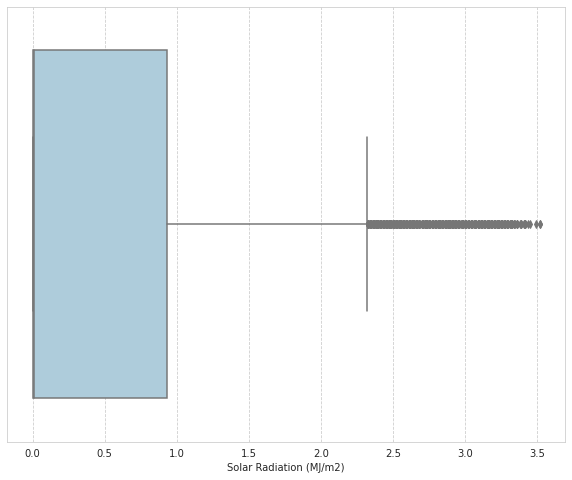

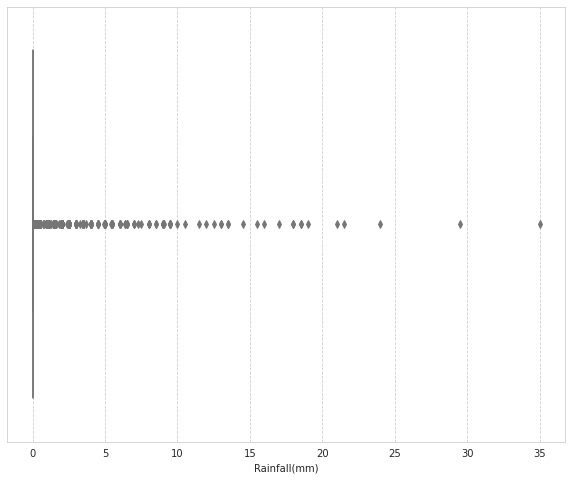

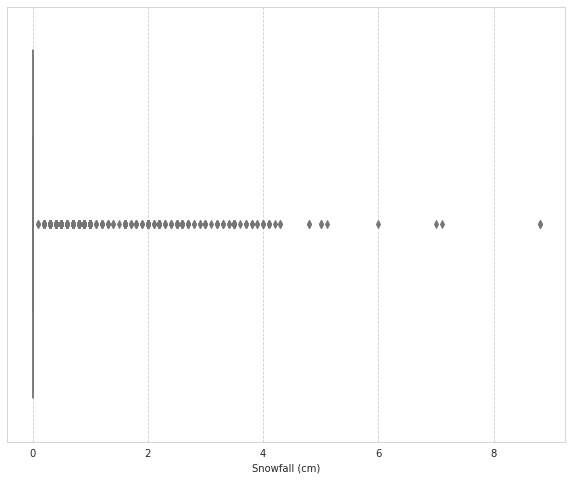

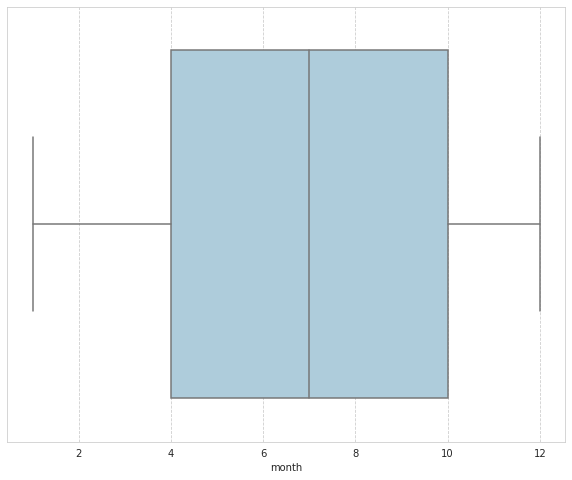

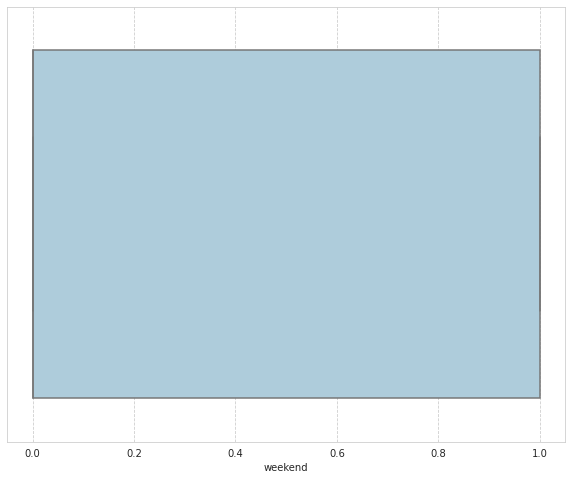

In [30]:
#Let get boxplot for each numberical Feature
for elem in numeric_feature[1:]:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=seoul_df[elem],palette="Paired")
    plt.xlabel(elem)
plt.show()

In [31]:
# #Checking the outliers in Solar Radiation features
# Q1=seoul_df['Solar Radiation (MJ/m2)'].quantile(0.25)
# Q3=seoul_df['Solar Radiation (MJ/m2)'].quantile(0.75)
# IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
# Lower_Whisker = Q1 - (1.5*IQR)
# Upper_Whisker = Q3 + (1.5*IQR)
# print(Lower_Whisker, Upper_Whisker)


In [32]:
# #outliers can be any points below Lower or upper whiskers
# seoul_df = seoul_df[seoul_df['Solar Radiation (MJ/m2)']< Upper_Whisker]

Here as we can see above 90 of the data in rainfall belong to 0.0 which in way hamper our modelling during training and testing as most of the results in overfitting and poor test results same in case of snowfall as we can see.

In [33]:
# #Checking the outliers in Wind Speed features
# Q1=seoul_df['Wind speed (m/s)'].quantile(0.25)
# Q3=seoul_df['Wind speed (m/s)'].quantile(0.75)
# IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
# Lower_Whisker = Q1 - (1.5*IQR)
# Upper_Whisker = Q3 + (1.5*IQR)
# print(Lower_Whisker, Upper_Whisker)


In [34]:
# #outliers can be any points below Lower or upper whiskers
# seoul_df = seoul_df[seoul_df['Wind speed (m/s)']< Upper_Whisker]

In [35]:
numeric_feature

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [36]:
seoul_df.shape

(8760, 15)

In [37]:
seoul_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekend'],
      dtype='object')

##After testing multicollinearity using VIF and removing outliers using boxplot we get most important feature for our modelling

In [38]:
numeric_feature=seoul_df.select_dtypes(include='number')
numeric_feature

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [39]:

string_features = seoul_df.select_dtypes(include='object')
string_features


,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [40]:
string_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


##Data Preparation

In [41]:
seoul_df.shape

(8760, 15)

#Creating Dummy Variables


In [98]:
dum_cat=pd.get_dummies(string_features,drop_first=True)
dum_cat

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [43]:
#concatening all the numeric as well as dummy categorical feature to have the final dataframe
seoul_final_df=pd.concat([dum_cat,numeric_feature],axis=1)
seoul_final_df

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,0
8756,0,0,0,1,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,0
8757,0,0,0,1,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,0
8758,0,0,0,1,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,0


In [44]:
seoul_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   uint8  
 1   Seasons_Summer             8760 non-null   uint8  
 2   Seasons_Winter             8760 non-null   uint8  
 3   Holiday_No Holiday         8760 non-null   uint8  
 4   Functioning Day_Yes        8760 non-null   uint8  
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(°C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(°C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

In [45]:
seoul_final_df.shape



(8760, 17)

In [46]:
seoul_final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


In [47]:
seoul_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Spring             8760 non-null   uint8  
 1   Seasons_Summer             8760 non-null   uint8  
 2   Seasons_Winter             8760 non-null   uint8  
 3   Holiday_No Holiday         8760 non-null   uint8  
 4   Functioning Day_Yes        8760 non-null   uint8  
 5   Rented Bike Count          8760 non-null   int64  
 6   Hour                       8760 non-null   int64  
 7   Temperature(°C)            8760 non-null   float64
 8   Humidity(%)                8760 non-null   int64  
 9   Wind speed (m/s)           8760 non-null   float64
 10  Visibility (10m)           8760 non-null   int64  
 11  Dew point temperature(°C)  8760 non-null   float64
 12  Solar Radiation (MJ/m2)    8760 non-null   float64
 13  Rainfall(mm)               8760 non-null   float

In [48]:
calculate_vif(seoul_final_df[[i for i in seoul_final_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Seasons_Spring,3.538038
1,Seasons_Summer,3.932495
2,Seasons_Winter,4.977754
3,Holiday_No Holiday,19.915028
4,Functioning Day_Yes,30.530833
5,Hour,4.536074
6,Temperature(°C),56.929050
7,Humidity(%),34.338285
8,Wind speed (m/s),4.924973
9,Visibility (10m),9.870559


##Let's create functions so to calculate scores and to train Linear models

In [49]:
#creating list to store evalustion matrices of all the models
mse_list=[]
rmse_list=[]
r2_list=[]
adjusted_r2_list=[]

In [50]:
#create functions so to train and also to evaluate all linear models

def linearModel_train(model, X_train,y_train,X_test,y_test):

  #model training
  model.fit(X_train,y_train)

  #value pediction
  pred_value=model.predict(X_test)
  
 
  #mean squarred error 
  MSE = mean_squared_error(y_test**2,pred_value**2)
  print("MSE :" , MSE)

  #root mean square error
  RMSE = np.sqrt(MSE)
  print('RMSE :', RMSE)

  #r2  square
  r2 = r2_score(y_test**2,pred_value**2)
  print('R2 :', r2)

  #Adjusted r2 score
  adjusted_r2=1-(1-r2_score(y_test**2,pred_value**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adjusted_r2)
 
  #adding scores to lists
  mse_list.append(MSE)
  rmse_list.append(RMSE)
  r2_list.append(r2)
  adjusted_r2_list.append(adjusted_r2)

##Lets create function for tree and ensemble models  

In [51]:
from sklearn import linear_model
def tree_ensemble_model(model, X_train,y_train,X_test,y_test):

  #model training
  model.fit(X_train,y_train)

  #value pediction
  preds_value=model.predict(X_test)
  
  
  #mean squarred error 
  MSE = mean_squared_error(y_test,preds_value)
  print("MSE :" , MSE)

  #root mean square error
  RMSE = np.sqrt(MSE)
  print('RMSE :', RMSE)

  #r2  square
  r2 = r2_score(y_test,preds_value)
  print('R2 :', r2)

  #Adjusted r2 score
  adjusted_r2=1-(1-r2_score(y_test,preds_value))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adjusted_r2)

 #adding scores to lists
  mse_list.append(MSE)
  rmse_list.append(RMSE)
  r2_list.append(r2)
  adjusted_r2_list.append(adjusted_r2) 

##**Creating Function to get graph for Linear,tree,ensemble based model**

In [52]:
 #plotting evaluation metrices to graph
def get_linear_graph(model, X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  pred_value=model.predict(X_test) 
  plt.figure(figsize=(20,10))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

In [53]:
 #plotting evaluation graph
def get_graph(model, X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  preds_value=model.predict(X_test)
  plt.figure(figsize=(20,10))
  plt.plot(np.array(y_test[:100]))
  plt.plot(preds_value[:100])
  plt.legend(['Actual','Predicted'],prop={'size': 20})
  plt.show()

##Lets create function to get feature importance

In [54]:
def get_feat_imp(model,X_train):

  features = X_train.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)
  c = ['green', 'yellow', 'pink', 'maroon', 'orange']
  plt.figure(figsize=(15,10),dpi=100)
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color=c,align='center')
  plt.yticks(range(len(indices)), [features[i]  for i in indices])
  plt.xlabel('Relative Importance')
  plt.xticks(rotation = 90)

  plt.show()

In [55]:
!pip install lime

     |████████████████████████████████| 275 kB 9.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=520a3eb44e5489f8c42c1ba51b28a60f2120e5e854692ed15de787a8756b4e66
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [56]:
import lime
import lime.lime_tabular

def Lime_Tabular_explainer(model, X_train,y_train,X_test,y_test):
  X = X_test
  feature_names=list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  choosen_instance= X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features= num_features)
  exp.show_in_notebook(show_table=True)
  

##Train Test Split for Linear Regression

In [57]:
X=seoul_final_df.drop(['Rented Bike Count'],axis = 1)

In [58]:
X.shape

(8760, 16)

In [59]:
y=np.sqrt(seoul_final_df['Rented Bike Count'])

In [60]:
#splitting the test and train data to a rate of 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [61]:
#data scalling
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test =std.transform(X_test)

##Linear Regression

In [62]:
#Linear regression

linear_regression_model=LinearRegression()

#calling linearModel_train function to train,fit,evaluation and plotting graph for Linear regression model
linearModel_train(linear_regression_model, X_train,y_train,X_test,y_test)

MSE : 176498.69541552663
RMSE : 420.11747811240446
R2 : 0.5729428561057134
Adjusted R2 :  0.5690045769689361


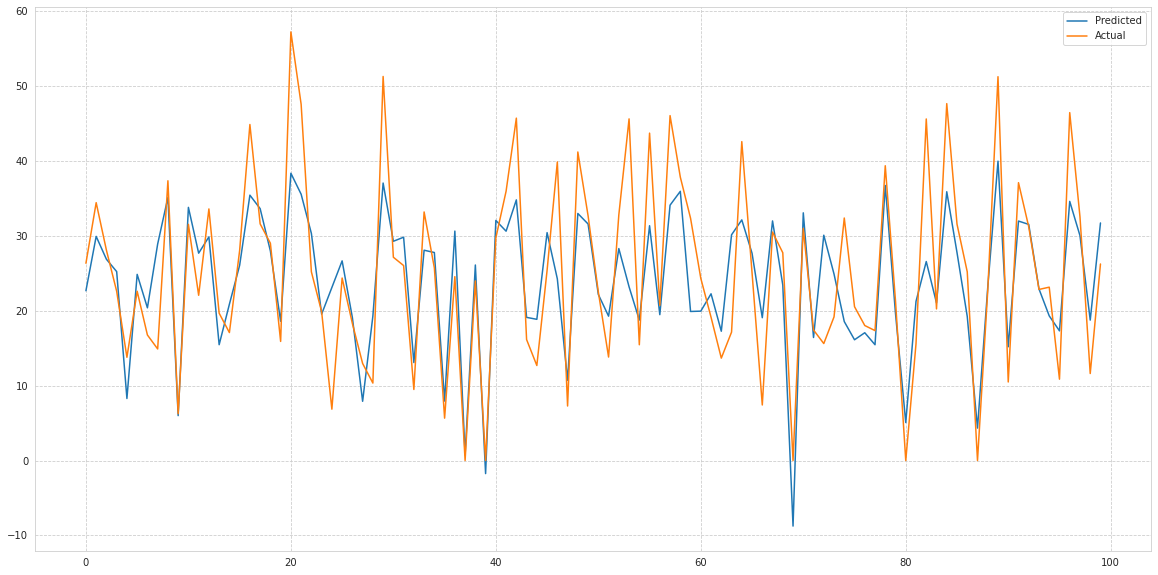

In [63]:
get_linear_graph(linear_regression_model, X_train,y_train,X_test,y_test)

##Lasso Regression

In [64]:
lasso_model = Lasso()
#Finding pest parameter for alpha through gridsearchCV in Lasso
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid_search = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5) #Taking cross validation equals to 5



In [65]:
#calling linearModel_train function to train,fit,evaluation and plotting graph for Lasso model
linearModel_train(lasso_grid_search, X_train,y_train,X_test,y_test)

MSE : 176476.1168178531
RMSE : 420.0906054863083
R2 : 0.5729974873958366
Adjusted R2 :  0.569059712063464


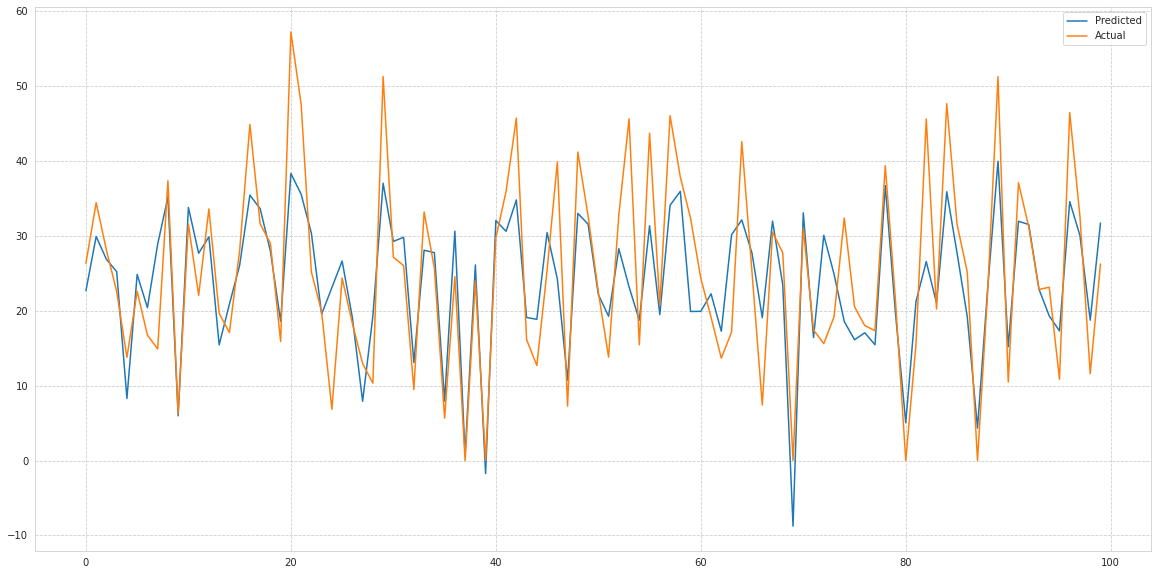

In [66]:
get_linear_graph(lasso_grid_search, X_train,y_train,X_test,y_test)

##Ridge Regression

In [67]:
ridge = Ridge()
#Finding the parameter for alpha in ridge regression
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

In [68]:
#calling linearModel_train function to train,fit,evaluation and plotting graph of Ridge model
linearModel_train(ridge_grid_search, X_train,y_train,X_test,y_test)

MSE : 176334.33420385115
RMSE : 419.92181915667487
R2 : 0.5733405453320268
Adjusted R2 :  0.569405933646328


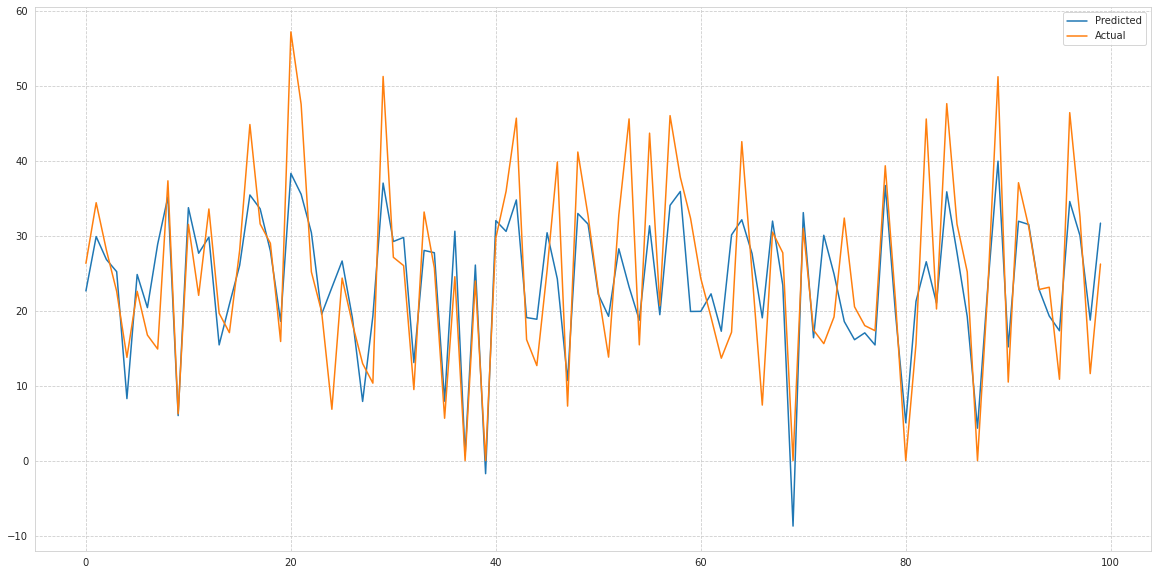

In [69]:
get_linear_graph(ridge_grid_search, X_train,y_train,X_test,y_test)

##ElasticNet Regression

In [70]:
elastic = ElasticNet()
#Finding best parameter of alpha for elasticnet
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid_search = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

In [71]:
#calling linearModel_train function to train,fit,evaluation and plotting graph of ElasticNet model
linearModel_train(elastic_grid_search, X_train,y_train,X_test,y_test)

MSE : 176212.59948562746
RMSE : 419.7768448659686
R2 : 0.573635095277311
Adjusted R2 :  0.5697031999023467


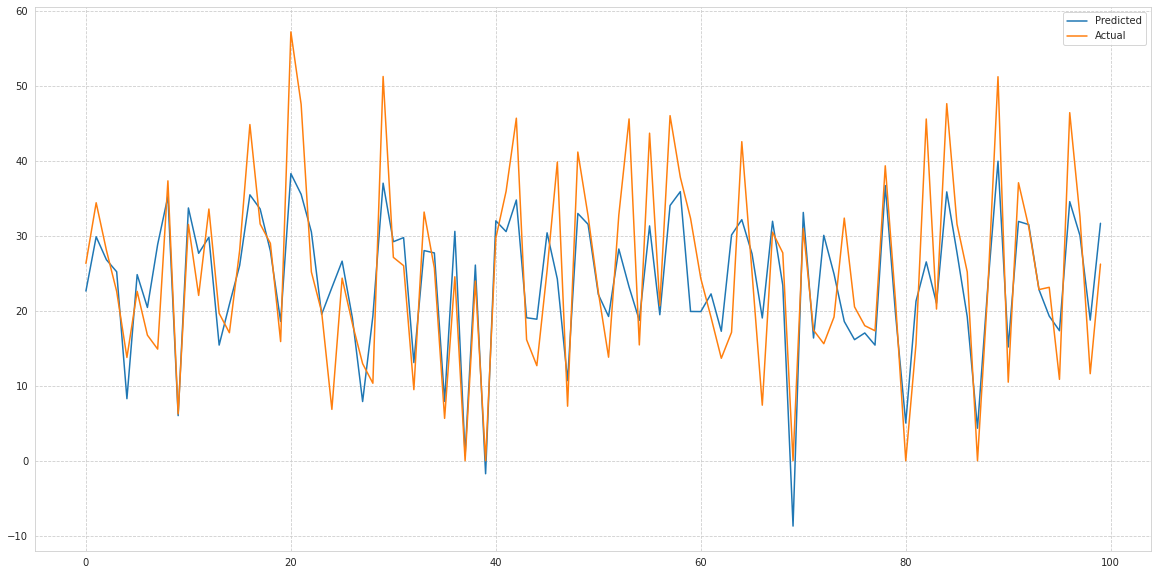

In [72]:
get_linear_graph(elastic_grid_search, X_train,y_train,X_test,y_test)

##Polynomial Regression

In [73]:
pipe= make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
#calling linearModel_train function to train,fit,evaluation and plotting graph of ElasticNet model
linearModel_train(pipe, X_train,y_train,X_test,y_test)

MSE : 111429.75435105794
RMSE : 333.8109560081244
R2 : 0.7303839978761761
Adjusted R2 :  0.7278976255222965


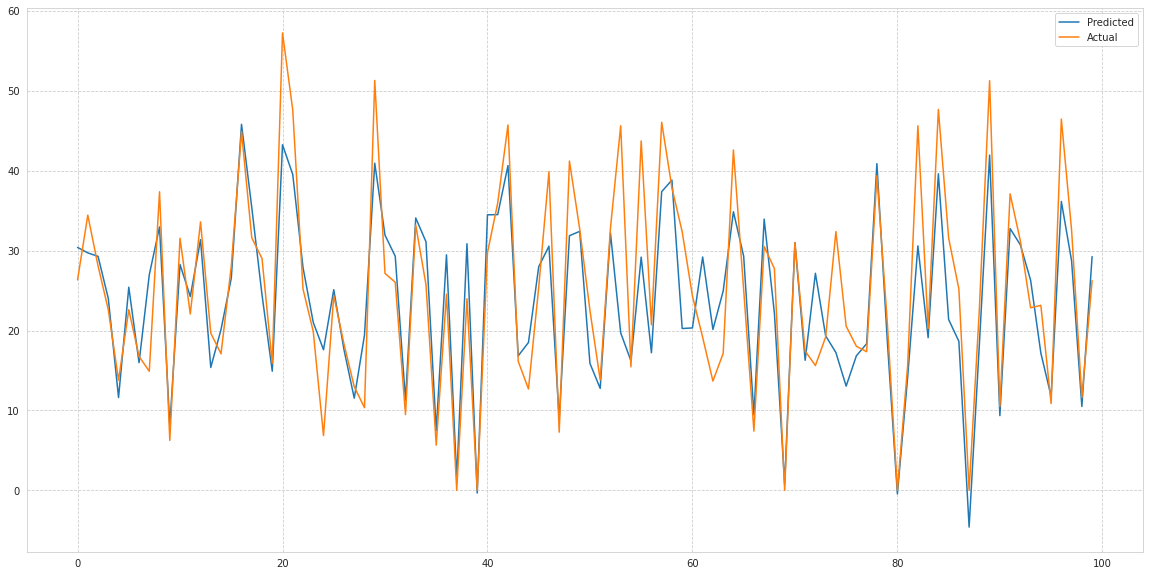

In [74]:
get_linear_graph(pipe, X_train,y_train,X_test,y_test)

#**Train and test Split for Tree and Ensemble Based Models**

In [75]:
#creating independent variable X
X= seoul_final_df.drop(['Rented Bike Count'],axis=1)

In [76]:
#creating dependent variable y
y= seoul_final_df['Rented Bike Count']

In [77]:
#splitting the variable X and y into train and test data in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##Decision Tree Regession

In [78]:
decision_tree=DecisionTreeRegressor()
#calling  tree_based_model function to train,fitnevaluate and graph plot for decision tree
tree_ensemble_model(decision_tree, X_train,y_train,X_test,y_test)

MSE : 61625.792237442925
RMSE : 248.24542742504428
R2 : 0.8508899186977792
Adjusted R2 :  0.8495148401382198


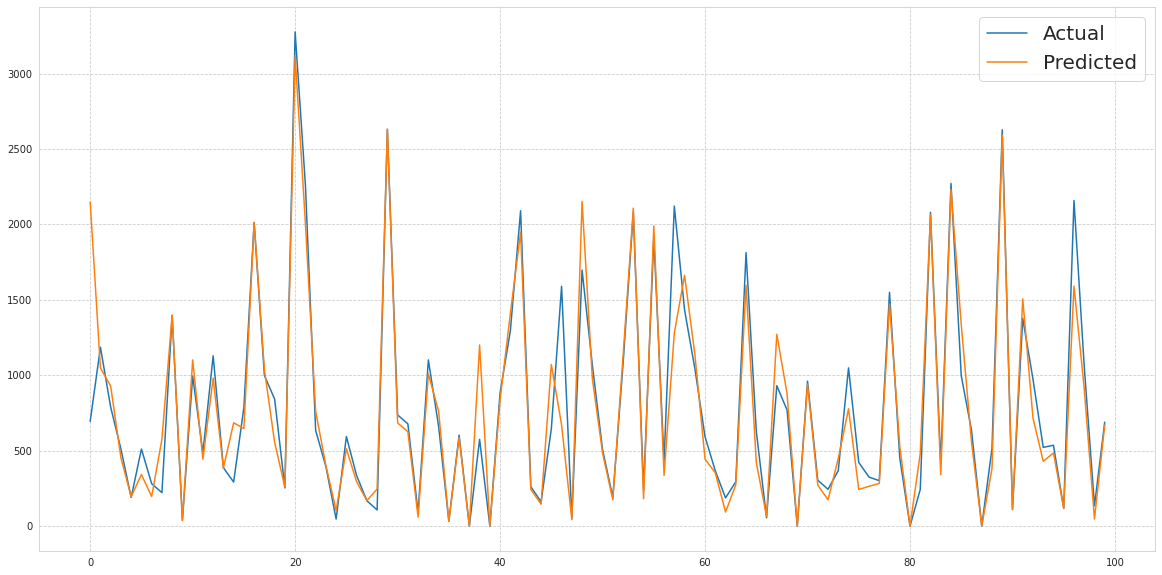

In [79]:
get_graph(decision_tree, X_train,y_train,X_test,y_test)

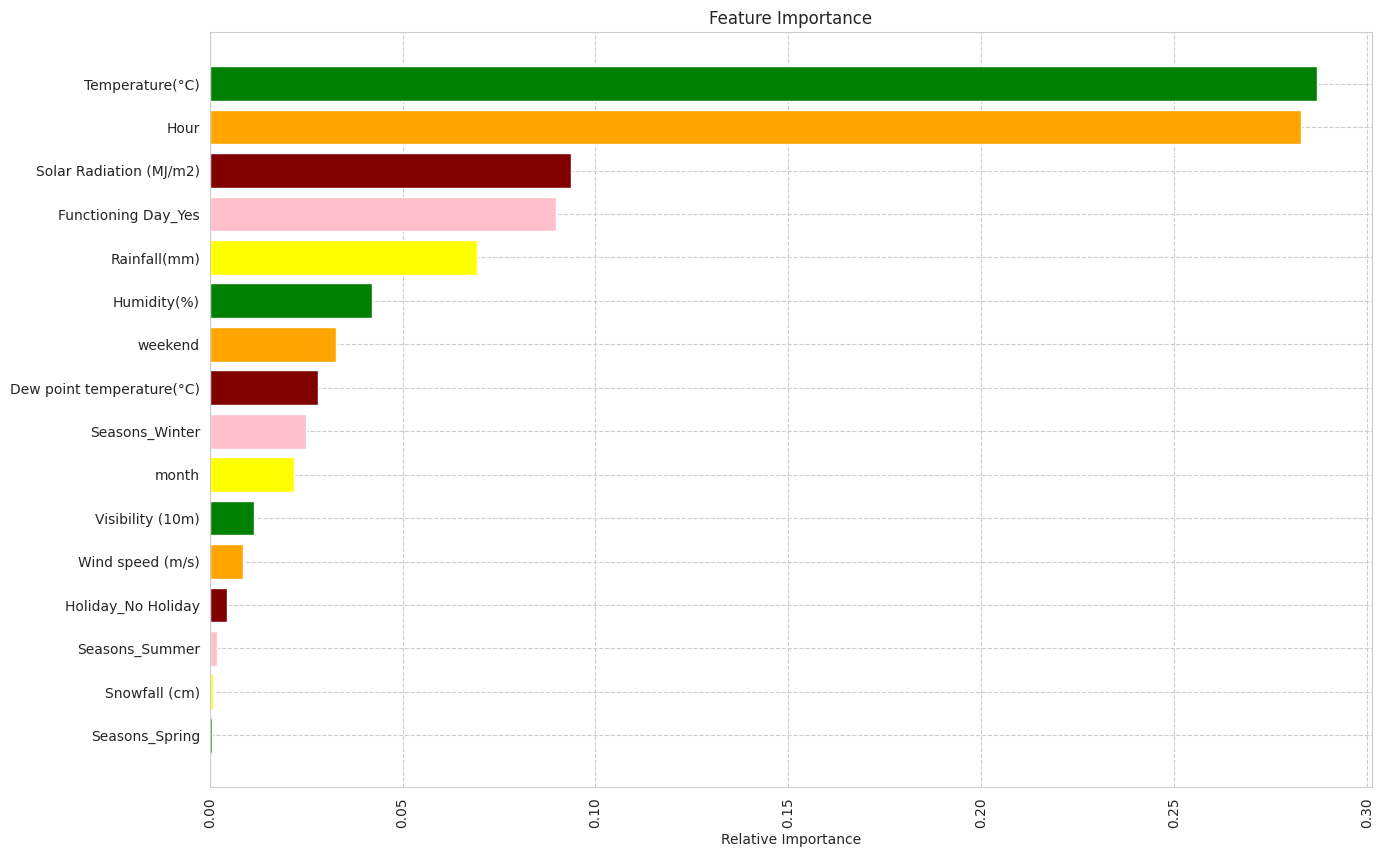

In [80]:
get_feat_imp(decision_tree,X_train)

#Random Forest

In [81]:
#random forest model
random_forest=RandomForestRegressor()

In [82]:
#checking gridseach best parameter for random forest
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [83]:
randomforest_grid= GridSearchCV(random_forest,param_grid=params,verbose=0)

In [84]:
tree_ensemble_model(randomforest_grid, X_train,y_train,X_test,y_test)

MSE : 47576.480772992756
RMSE : 218.12033553291806
R2 : 0.8848837043944044
Adjusted R2 :  0.8838221131957361


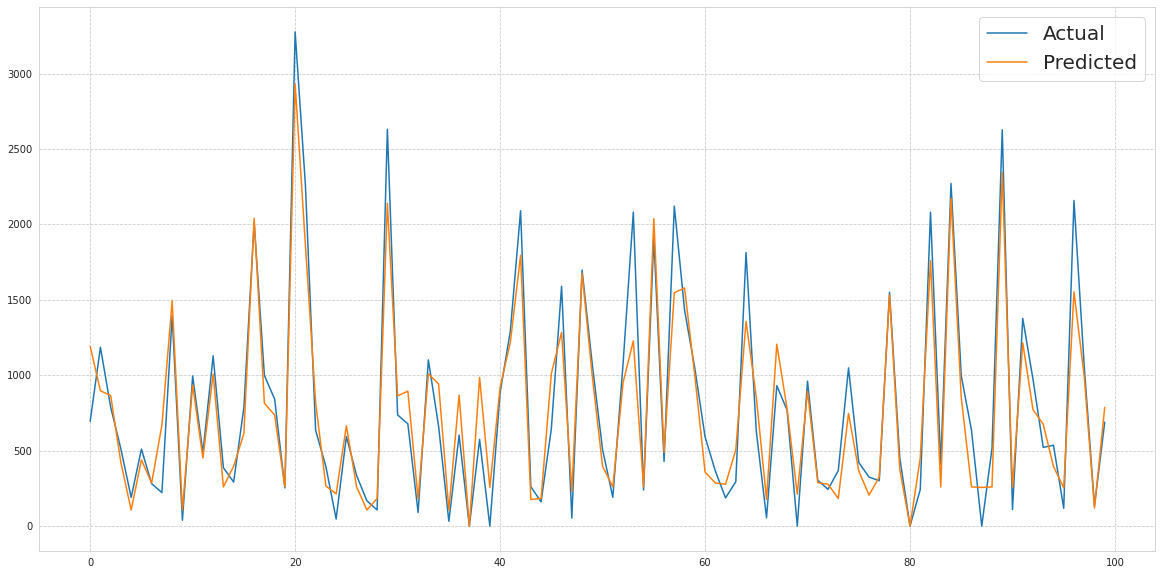

In [85]:
get_graph(randomforest_grid, X_train,y_train,X_test,y_test)

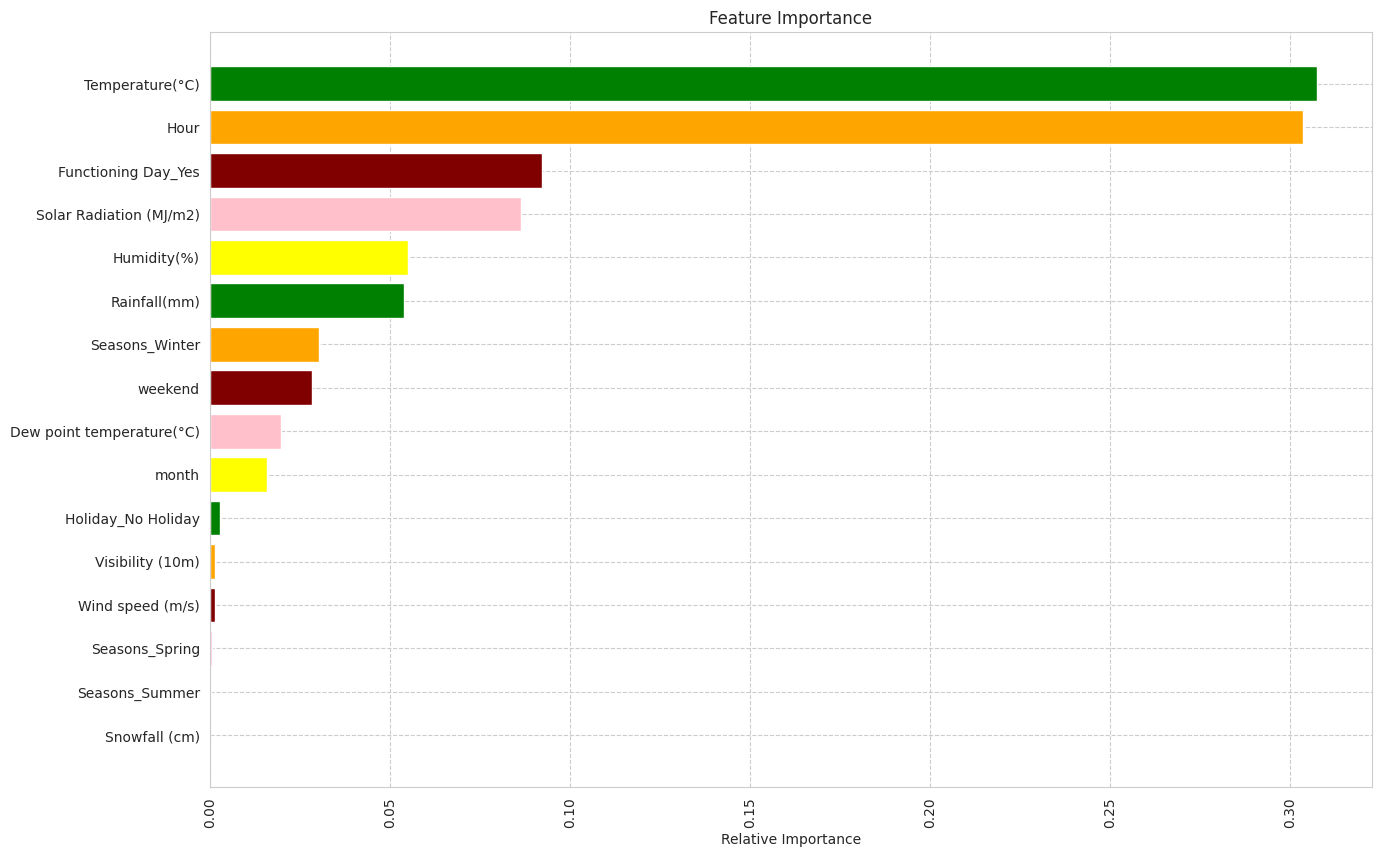

In [86]:
optimal_randomforest_model=randomforest_grid.best_estimator_

get_feat_imp(optimal_randomforest_model,X_train)

##KNN(K-Nearest-Neighbour)

In [87]:
#KNN regression model
knn=KNeighborsRegressor(n_jobs=-1)

scaler = MinMaxScaler()

X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
tree_ensemble_model(knn_grid,X_train_scaler,y_train,X_test_scaler,y_test)

MSE : 62180.18837899544
RMSE : 249.35955642203777
R2 : 0.8495484989652422
Adjusted R2 :  0.8481610499643453


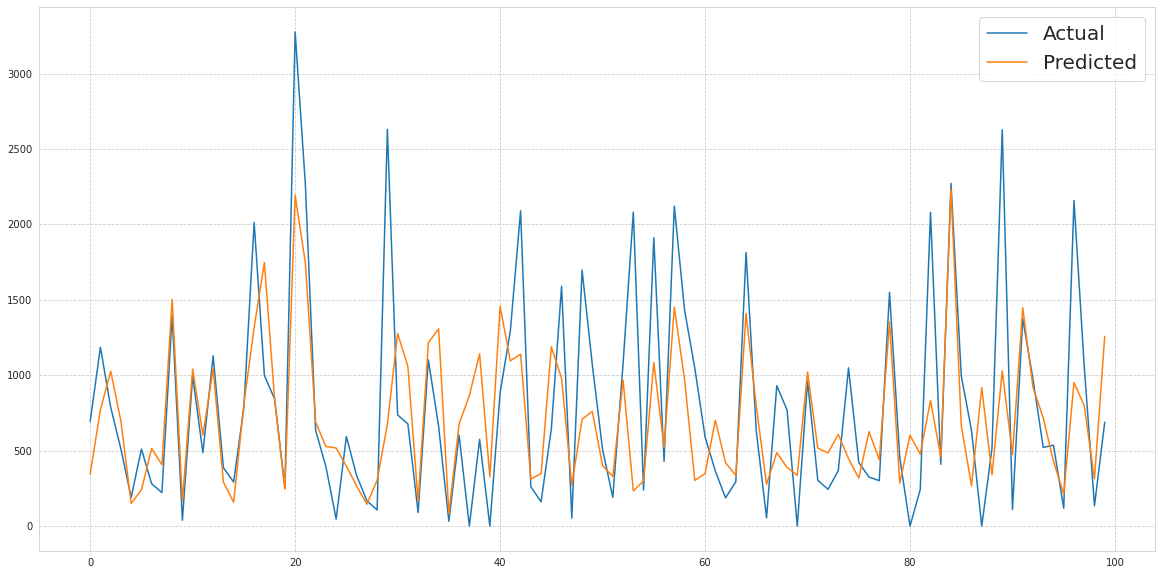

In [88]:
get_graph(knn_grid, X_train,y_train,X_test,y_test)

##Gradient Boosting

In [89]:
gradient_boosting=GradientBoostingRegressor()

In [90]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [91]:
gradient_boosting_grid=GridSearchCV(gradient_boosting,param_grid=params,verbose=0)

In [92]:
tree_ensemble_model(gradient_boosting_grid, X_train,y_train,X_test,y_test)

KeyboardInterrupt: ignored

In [ ]:
get_graph(gradient_boosting_grid, X_train,y_train,X_test,y_test)

In [ ]:
optimal_GradientBoosting_model=gradient_boosting_grid.best_estimator_

get_feat_imp(optimal_GradientBoosting_model,X_train)

##XGBoost

In [ ]:
xgb_model=XGBRegressor()

In [ ]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

parameter={'n_estimators':n_estimators,'max_depth':max_depth}

In [ ]:
xgb_grid=GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [ ]:
tree_ensemble_model(xgb_grid, X_train,y_train,X_test,y_test)

In [ ]:
get_graph(xgb_grid, X_train,y_train,X_test,y_test)

In [ ]:
op_xgb_model=xgb_grid.best_estimator_
get_feat_imp(op_xgb_model,X_train)

##CatBoost

In [ ]:
catboost=CatBoostRegressor(verbose=0)

In [ ]:
tree_ensemble_model(catboost, X_train,y_train,X_test,y_test)

In [ ]:
get_graph(catboost, X_train,y_train,X_test,y_test)

In [ ]:
catboost.get_all_params()

In [ ]:
get_feat_imp(catboost,X_train)

##LightGBM

In [ ]:
lgb_r=lgb.LGBMRegressor()

In [ ]:
n_estimators=[150,200,250]
max_depth=[7,10,13]

lgb_r_params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
lgb_r_grid=GridSearchCV(estimator=lgb_r,param_grid=lgb_r_params,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [ ]:
tree_ensemble_model(lgb_r_grid, X_train,y_train,X_test,y_test)

In [ ]:
get_graph(lgb_r_grid, X_train,y_train,X_test,y_test)

In [ ]:
op_lgb_r=lgb_r_grid.best_estimator_

In [ ]:
get_feat_imp(op_lgb_r,X_train)

#**Lets see all the models with their evaluation matrices combined**

In [ ]:
evaluation_matrices={'MSE':mse_list,'RMSE':rmse_list,'r2 score':r2_list,'Adjusted r2 score':adjusted_r2_list}

list_of_models=['Linear','Lasso','Ridge','ElasticNet','Polynomial','Decision Tree','Random Forest','KNN','GB','XGB','CatBoost','LBGM']

model_df=pd.DataFrame.from_dict(evaluation_matrices,orient='index',columns=list_of_models)

model_df

In [ ]:
model_df2=model_df.transpose().reset_index().rename(columns={'index':'Model'})
model_df2

In [ ]:
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Model',y='Adjusted r2 score',data=model_df2.sort_values('Adjusted r2 score'),palette="colorblind").set(title='Adjusted R2 of all Models')
plt.xticks(rotation=90);

##Model explainability
##SHAP

##Creating function for getting shape of JS visualization using shap in notebook environment

In [ ]:
from sklearn.tree import export_graphviz
import shap 

In [ ]:
#creating function for getting shape of JS visualization using shap in notebook environment
def get_shap(model):
  sns.set_style('darkgrid')
  for_instance=2
  shap.initjs()
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(X_test,check_additivity=False)
  return shap.plots.force(shap_values[for_instance])

##Shap for XGBoost

In [ ]:
get_shap(decision_tree)

In [ ]:
get_shap(optimal_randomforest_model)

In [ ]:
#getting shap model for XGBoost
get_shap(op_xgb_model)

##Shap for CatBoost Model

In [ ]:
#getting shap model for CatBoost
get_shap(catboost)

##Shap for LightGBM Model

In [ ]:
#getting shap model for LightGBM model
get_shap(op_lgb_r)

##**ELI5**

##Creating function to get ELI5

In [ ]:
def get_eli5(model):
  feature_names=list(X_test.columns)
  for_instance=2
  return eli.show_prediction(model, X_test.reset_index(drop=True).loc[[for_instance]],feature_names=feature_names,show_feature_values=True)

In [ ]:
get_eli5(decision_tree)

In [ ]:
get_eli5(optimal_randomforest_model)

###ELI5 for XGBoost Model

In [ ]:
get_eli5(op_xgb_model)

###ELI5 for lightBGM Model

In [ ]:
get_eli5(op_lgb_r)